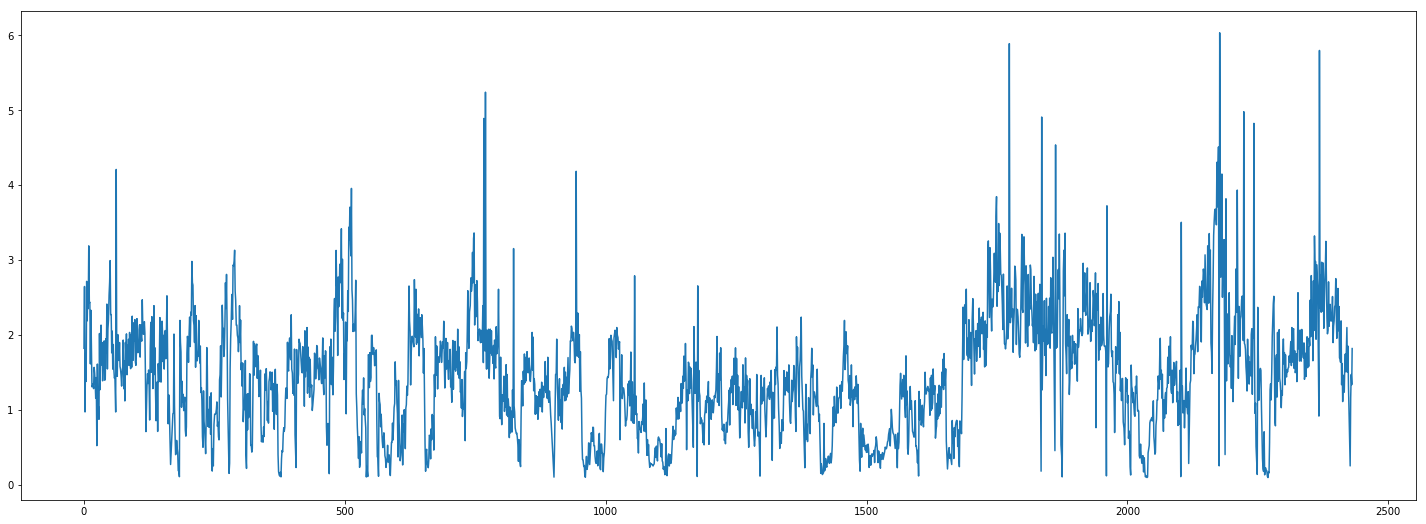

In [10]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np


file = pandas.read_csv('train.oslo-vestby-report.2011-02-14_0644CET.log', names = ["band"], sep = '\t')

dataset = file["band"][:]
dataset = dataset[:]
plt.figure(figsize=(25,9))
plt.plot(dataset)
plt.show()

In [11]:
dataset = np.asarray(dataset)

dataset.shape
dataset = np.vstack(dataset)
dataset.shape

(2320, 1)

In [14]:
model_mse = keras.models.load_model('model_mse.h5')

InternalError: GPU sync failed

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 100))
dataset = scaler.fit_transform(dataset)

In [ ]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
look_back = 1
testX, testY = create_dataset(dataset, look_back)
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY_inverse = scaler.inverse_transform([testY])

In [8]:
testX.shape

(2318, 1, 1)

In [9]:
testPredict = model_mse.predict(testX)
testPredict_mse = scaler.inverse_transform(testPredict)

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict_mse[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

InternalError: Blas GEMM launch failed : a.shape=(32, 1), b.shape=(1, 256), m=32, n=256, k=1
	 [[Node: lstm_6/while/MatMul_3 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](lstm_6/while/TensorArrayReadV3, lstm_6/while/MatMul_3/Enter)]]
	 [[Node: dense_2/BiasAdd/_529 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1203_dense_2/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'lstm_6/while/MatMul_3', defined at:
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-52cf0c6e2274>", line 1, in <module>
    model_mse = keras.models.load_model('model_mse.h5')
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py", line 243, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py", line 317, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/__init__.py", line 55, in deserialize
    printable_module_name='layer')
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/utils/generic_utils.py", line 144, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py", line 1350, in from_config
    model.add(layer)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py", line 467, in add
    layer(x)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 499, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/engine/topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 2063, in call
    initial_state=initial_state)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 608, in call
    input_length=timesteps)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 2764, in rnn
    swap_memory=True)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2934, in while_loop
    result = loop_context.BuildLoop(cond, body, loop_vars, shape_invariants)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2720, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2662, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 2750, in _step
    tuple(constants))
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 599, in step
    return self.cell.call(inputs, states, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 1835, in call
    x_o = K.dot(inputs_o, self.kernel_o)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 1072, in dot
    out = tf.matmul(x, y)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 2022, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2516, in _mat_mul
    name=name)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(32, 1), b.shape=(1, 256), m=32, n=256, k=1
	 [[Node: lstm_6/while/MatMul_3 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](lstm_6/while/TensorArrayReadV3, lstm_6/while/MatMul_3/Enter)]]
	 [[Node: dense_2/BiasAdd/_529 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_1203_dense_2/BiasAdd", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [9]:



# plot baseline and predictions
plt.figure(figsize=(25,9))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredict_mse)
plt.show()

InternalError: Blas GEMM launch failed : a.shape=(32, 1), b.shape=(1, 256), m=32, n=256, k=1
	 [[Node: lstm_6/while/MatMul_3 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](lstm_6/while/TensorArrayReadV3, lstm_6/while/MatMul_3/Enter)]]

Caused by op 'lstm_6/while/MatMul_3', defined at:
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-52cf0c6e2274>", line 1, in <module>
    model_mse = keras.models.load_model('model_mse.h5')
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py", line 243, in load_model
    model = model_from_config(model_config, custom_objects=custom_objects)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py", line 317, in model_from_config
    return layer_module.deserialize(config, custom_objects=custom_objects)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/__init__.py", line 55, in deserialize
    printable_module_name='layer')
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/utils/generic_utils.py", line 144, in deserialize_keras_object
    list(custom_objects.items())))
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py", line 1350, in from_config
    model.add(layer)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/models.py", line 467, in add
    layer(x)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 499, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/engine/topology.py", line 617, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 2063, in call
    initial_state=initial_state)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 608, in call
    input_length=timesteps)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 2764, in rnn
    swap_memory=True)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2934, in while_loop
    result = loop_context.BuildLoop(cond, body, loop_vars, shape_invariants)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2720, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2662, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 2750, in _step
    tuple(constants))
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 599, in step
    return self.cell.call(inputs, states, **kwargs)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/layers/recurrent.py", line 1835, in call
    x_o = K.dot(inputs_o, self.kernel_o)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 1072, in dot
    out = tf.matmul(x, y)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 2022, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2516, in _mat_mul
    name=name)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/home/runchen/anaconda3/envs/tensorflow/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(32, 1), b.shape=(1, 256), m=32, n=256, k=1
	 [[Node: lstm_6/while/MatMul_3 = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](lstm_6/while/TensorArrayReadV3, lstm_6/while/MatMul_3/Enter)]]
